# **Taller EDA: predicción del precio de venta de una casa.**

## **Introducción**

Antes de comprar una vivienda, los futuros propietarios deben tener en cuenta una gran variedad de factores que pueden influir en su decisión de compra. Variables como el área del lote, la ubicación, el número de habitaciones, el número de baños o la cercanía a servicios esenciales, juegan un papel determinante al momento de escoger y negociar la casa que más se adecúa a las necesidades de cada cliente. Sin embargo, el precio final de la vivienda es uno de los factores determinantes, porque en muchas ocasiones establece los límites de la vivienda que una familia puede adquirir.
El siguientete análisis exploratorio de datos (EDA) se realizó con base en un dataset compuesto por 79 variables explicativas, con el objetivo de identificar aquellas que tienen mayor correlación con el precio final de una vivienda en Ames, Iowa.

A través de este enfoque, se busca entender cuáles de las variables predictoras tienen el mayor impacto en el valor de las propiedad. Lo anterior con el ánimo de realizar predicciones más precisas y ofrecer recomendaciones a posibles compradores y agentes inmobiliario

## **Análisis de variables según tipo**

El dataset consta de 2919 registros de propiedades en Ames, Iowa; cada unos de los cuales se describe mediante 79 variables explicativas o predictores relacionadas con los aspectos más importantes a tener en cuenta al momento de comprar una vivienda; así como la variable objetivo (o target), correspondiente al precio de venta de la vivienda (SalePrice).
A continuación se presenta una lista de los predictores, describiendo qué representa cada uno así como el tipo de variable al que corresponde.
Variables categóricas:




En conclusión, se tiene xxx variables categóricas y xxx numéricas, de las cuales, para efectos de nuestro análisis tomamos las siguientes:

1. MSSubclass:     Tipo_Vivienda (Número de pisos y antigüedad, tomando anteriores y posteriores a 1946)
2. LotArea:		Area_Lote (En pies cuadrados)
3. LotShape	    Forma_Lote (Regular, irregular y formas intermedias)
4. HouseStyle	    Estilo_Casa (Número de pisos y estado de terminación del segundo)
5. OverallQual	    Material_Acabados (Ordinal entre 1 (Muy pobre) y 10 (Excepcional))
6. Foundation	    Tipo_Cimentación
7. BedroomAbvGr	No. Habitaciones
8. KitchenAbvGr	No. Cocinas
9. OverallCond	    Cond_Generales
10. Neighborhood	Vecinadario
11. SalePrice	    Precio_Venta (Variable Objetivo)


El criterio de selección inicial corresponde a aquellas variables cuyos valores en su mayoría no son constantes.

# Paso 1: Kit de herramientas EDA con Python

## Cargar librerías

In [108]:
import seaborn as sns

In [109]:
import pandas as pd

In [110]:
import numpy as np

In [111]:
import matplotlib.pyplot as plt

In [112]:
import seaborn as sns

In [113]:
from sklearn import preprocessing, model_selection

# Paso 2: Importar los datos y leer el dataset

In [114]:
df = pd.read_csv("Data/House_sales.csv", sep=";")

In [115]:
df.shape # Para conocer el número de filas y columnas (f,c)

(2919, 81)

In [116]:
df.head() # Primeras 5 filas del dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [117]:
df.tail() # Últimas 5 filas del dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


# Paso 3: Análisis de datos

In [118]:
df.info() # muestra el tipo de datos de cada columna y si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [119]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [120]:
# Columnas con valores numéricos
df.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   YearBuilt      2919 non-null   int64  
 7   YearRemodAdd   2919 non-null   int64  
 8   MasVnrArea     2896 non-null   float64
 9   BsmtFinSF1     2918 non-null   float64
 10  BsmtFinSF2     2918 non-null   float64
 11  BsmtUnfSF      2918 non-null   float64
 12  TotalBsmtSF    2918 non-null   float64
 13  1stFlrSF       2919 non-null   int64  
 14  2ndFlrSF       2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2917 non-null   float64
 18  BsmtHalf

In [121]:
# Resumen estadístico de las columnas numéricas.
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Paso 4: Gestión de duplicaciones y valores faltantes 

### 4.1 Manejo de duplicaciones

In [122]:
duplicates = df.duplicated()

In [123]:
duplicates.value_counts()

False    2919
Name: count, dtype: int64

In [124]:
df = df.drop_duplicates()

### 4.2 Manejo de valores faltantes

#### 4.2.1 Identifcar las columnas con datos faltantes

In [125]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0]

In [126]:
missing_data

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

C:\Users\guill\AppData\Local\Temp\ipykernel_4624\982889040.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")


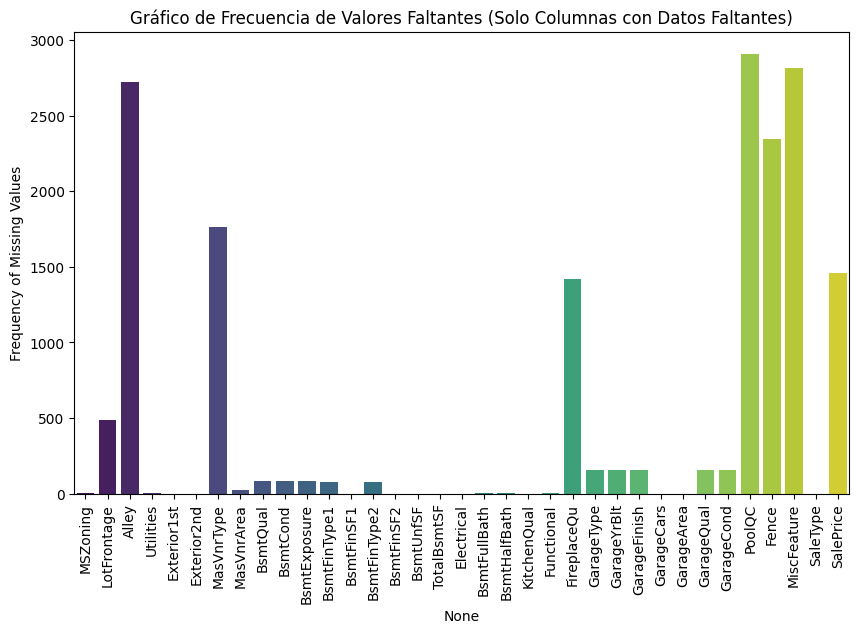

In [127]:
# Calculate the count of missing values for each column
missing_counts = df.isnull().sum()

# Filter to keep only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Create a bar plot for the frequency of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel('Frequency of Missing Values')
plt.title('Gráfico de Frecuencia de Valores Faltantes (Solo Columnas con Datos Faltantes)')
plt.show()

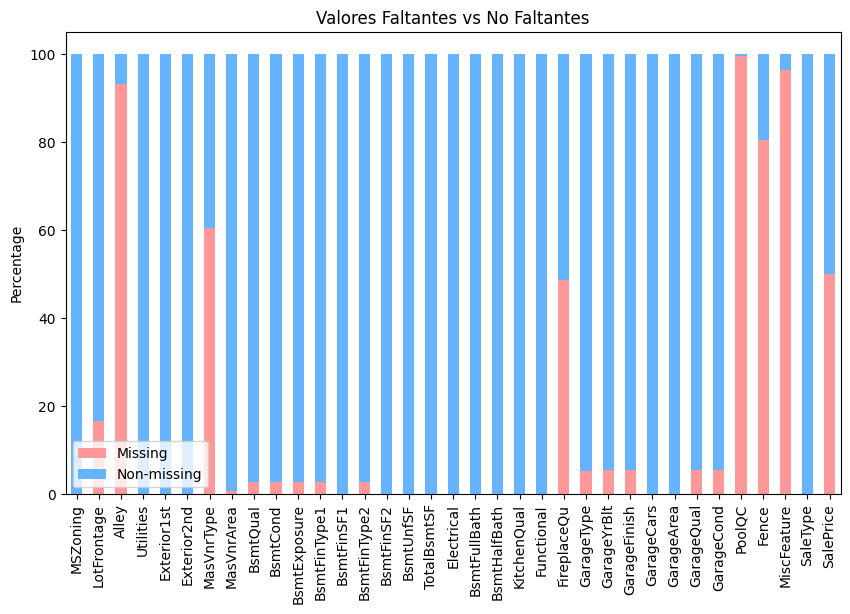

In [128]:
# Calculate percentage of missing and non-missing values
missing_percentage = df.isnull().mean() * 100
non_missing_percentage = 100 - missing_percentage

# Filter columns with missing values
missing_columns = missing_percentage[missing_percentage > 0].index

# Create a DataFrame for the plot
missing_data = pd.DataFrame({
    'Missing': missing_percentage[missing_columns],
    'Non-missing': non_missing_percentage[missing_columns]
}, index=missing_columns)

# Plot the stacked bar plot for columns with missing values
missing_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B3FF'])
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Valores Faltantes vs No Faltantes')
plt.show()

In [129]:
df["MSZoning"] = df['MSZoning'].mode()[0]

In [130]:
df["LotFrontage"] = df['LotFrontage'].median()

In [131]:
df["Utilities"] = df['Utilities'].mode()[0]

In [132]:
df["Exterior1st"] = df["Exterior1st"].mode()[0]

In [133]:
df["Exterior2nd"] = df["Exterior2nd"].mode()[0]

In [134]:
df["MasVnrType"] = df["MasVnrType"].mode()[0]

In [135]:
df["MasVnrArea"] = df["MasVnrArea"].median()

In [136]:
df["BsmtQual"] = df["BsmtQual"].mode()[0]

In [137]:
df["BsmtCond"] = df["BsmtCond"].mode()[0]

In [138]:
df["BsmtExposure"] = df["BsmtExposure"].mode()[0]

In [139]:
df["BsmtFinType1"] = df["BsmtFinType1"].mode()[0]

In [140]:
df["BsmtFinSF1"] = df["BsmtFinSF1"].median()

In [141]:
df["BsmtFinType2"] = df["BsmtFinType2"].mode()[0]

In [142]:
df["BsmtFinSF2"] = df["BsmtFinSF2"].median()

In [143]:
df["BsmtUnfSF"] = df["BsmtUnfSF"].median()

In [144]:
df["TotalBsmtSF"] = df["TotalBsmtSF"].median()

In [145]:
df["Electrical"] = df["Electrical"].mode()[0]

In [146]:
df["BsmtFullBath"] = df["BsmtFullBath"].mode()[0]

In [147]:
df["BsmtHalfBath"] = df["BsmtHalfBath"].mode()[0]

In [148]:
df["KitchenQual"] = df["KitchenQual"].mode()[0]

In [149]:
df["Functional"] = df["Functional"].mode()[0]

In [150]:
df["GarageType"] = df["GarageType"].mode()[0]

In [151]:
df["GarageYrBlt"] = df["GarageYrBlt"].mode()[0]

In [152]:
df["GarageFinish"] = df["GarageFinish"].mode()[0]

In [153]:
df["GarageCars"] = df["GarageCars"].mode()[0]

In [154]:
df["GarageArea"] = df["GarageArea"].median()

In [155]:
df["GarageQual"] = df["GarageQual"].mode()[0]

In [156]:
df["GarageCond"] = df["GarageCond"].mode()[0]

In [157]:
df["SaleType"] = df["SaleType"].mode()[0]

In [158]:
df = df.dropna(subset=['SalePrice'])

# Paso 5: Reducción de datos

In [159]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,68.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,68.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,68.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,68.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [160]:
data = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [161]:
data = data[['MSSubClass', 'LotArea', 'LotShape', 'HouseStyle', 'OverallQual', 'Foundation' , 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'Neighborhood', 'SalePrice']]

In [162]:
data.head()

,MSSubClass,LotArea,LotShape,HouseStyle,OverallQual,Foundation,BedroomAbvGr,KitchenAbvGr,OverallCond,Neighborhood,SalePrice
0,60,8450,Reg,2Story,7,PConc,3,1,5,CollgCr,208500.0
1,20,9600,Reg,1Story,6,CBlock,3,1,8,Veenker,181500.0
2,60,11250,IR1,2Story,7,PConc,3,1,5,CollgCr,223500.0
3,70,9550,IR1,2Story,7,BrkTil,3,1,5,Crawfor,140000.0
4,60,14260,IR1,2Story,8,PConc,4,1,5,NoRidge,250000.0


### 5.1 Imputar la variable sale price

In [163]:
['LotShape', 'HouseStyle', 'Foundation', 'Neighborhood']

['LotShape', 'HouseStyle', 'Foundation', 'Neighborhood']

In [164]:
data.dtypes

MSSubClass        int64
LotArea           int64
LotShape         object
HouseStyle       object
OverallQual       int64
Foundation       object
BedroomAbvGr      int64
KitchenAbvGr      int64
OverallCond       int64
Neighborhood     object
SalePrice       float64
dtype: object

# Paso 6: Limpieza disputa de datos

### 6.1 Cambiar el nombre de los valores

In [165]:
replacement_dict_ms_sub_class = {
    20: '1 PISO 1946 Y MÁS RECIENTES TODOS LOS ESTILOS', 
    30: '1 PISO 1945 Y MÁS ANTIGUOS', 
    40: '1 PISO CON ÁTICO TERMINADO TODAS LAS EDADES', 
    45: '1-1/2 PISO - SIN TERMINAR TODAS LAS EDADES',
    50: '1-1/2 PISOS TERMINADA TODAS LAS EDADES',
    60: '2 PISOS 1946 Y MÁS RECIENTES',
    70: '2 PISOS 1945 Y MÁS ANTIGUOS',
    75: '2-1/2 PISOS TODAS LAS EDADES',
    80: 'DIVIDIDO O MULTINIVEL',
    85: 'VESTÍBULO DIVIDIDO',
    90: 'DÚPLEX - TODOS LOS ESTILOS Y EDADES',
    120: 'PUD DE 1 PISO (Desarrollo de unidades planificadas) - 1946 y posteriores',
    150: 'PUD DE 1-1/2 PISOS - TODAS LAS EDADES',
    160: 'PUD DE 2 PISOS - 1946 Y POSTERIORES',
    180: 'PUD - MULTINIVEL - INCLUYE NIVEL DIVIDIDO/VESTÍBULO',
    190: '2 REFORMAS FAMILIARES - TODOS LOS ESTILOS Y EDADES'
}

In [166]:
data['MSSubClass'] = data['MSSubClass'].replace(replacement_dict_ms_sub_class)
data['MSSubClass']

0                        2 PISOS 1946 Y MÁS RECIENTES
1       1 PISO 1946 Y MÁS RECIENTES TODOS LOS ESTILOS
2                        2 PISOS 1946 Y MÁS RECIENTES
3                         2 PISOS 1945 Y MÁS ANTIGUOS
4                        2 PISOS 1946 Y MÁS RECIENTES
                            ...                      
1455                     2 PISOS 1946 Y MÁS RECIENTES
1456    1 PISO 1946 Y MÁS RECIENTES TODOS LOS ESTILOS
1457                      2 PISOS 1945 Y MÁS ANTIGUOS
1458    1 PISO 1946 Y MÁS RECIENTES TODOS LOS ESTILOS
1459    1 PISO 1946 Y MÁS RECIENTES TODOS LOS ESTILOS
Name: MSSubClass, Length: 1460, dtype: object

In [167]:
replacement_dict_overall_qual = {
    1: 'Muy pobre', 
    2: 'Pobre', 
    3: 'Regular', 
    4: 'Por debajo del promedio',
    5: 'Promedio',
    6: 'Por encima del promedio',
    7: 'Bueno',
    8: 'Muy bueno',
    9: 'Excelente',
    10: 'Excepcional'
}

In [168]:
data['OverallQual'] = data['OverallQual'].replace(replacement_dict_overall_qual)
data['OverallQual'].value_counts()

OverallQual
Promedio                   397
Por encima del promedio    374
Bueno                      319
Muy bueno                  168
Por debajo del promedio    116
Excelente                   43
Regular                     20
Excepcional                 18
Pobre                        3
Muy pobre                    2
Name: count, dtype: int64

In [169]:
replacement_dict_overall_cond = {
    1: 'Muy pobre', 
    2: 'Pobre', 
    3: 'Regular', 
    4: 'Por debajo del promedio',
    5: 'Promedio',
    6: 'Por encima del promedio',
    7: 'Bueno',
    8: 'Muy bueno',
    9: 'Excelente',
    10: 'Excepcional'
}

In [170]:
data['OverallCond'] = data['OverallCond'].replace(replacement_dict_overall_cond)
data['OverallCond'].value_counts()

OverallCond
Promedio                   821
Por encima del promedio    252
Bueno                      205
Muy bueno                   72
Por debajo del promedio     57
Regular                     25
Excelente                   22
Pobre                        5
Muy pobre                    1
Name: count, dtype: int64

In [171]:
replacement_dict_lot_shape = {
    'Reg': 'Forma regular', 
    'IR1': 'Forma ligeramente irregular', 
    'IR2': 'Forma moderadamente irregular', 
    'IR3': 'Forma irregular'
}

In [172]:
data['LotShape'] = data['LotShape'].replace(replacement_dict_lot_shape)
data['LotShape'].value_counts()

LotShape
Forma regular                    925
Forma ligeramente irregular      484
Forma moderadamente irregular     41
Forma irregular                   10
Name: count, dtype: int64

In [173]:
replacement_dict_house_style = {
    '1Story': 'Un piso', 
    '1.5Fin': 'Uno y medio pisos: segundo nivel terminado', 
    '1.5Unf': 'Uno y medio pisos: segundo nivel no terminado', 
    '2Story': 'Dos pisos', 
    '2.5Fin': 'Dos y medio pisos: segundo nivel terminado',
    '2.5Unf': 'Dos y medio pisos: segundo nivel no terminado', 
    'SFoyer': 'Vestíbulo dividido', 
    'SLvl': 'Nivel dividido'
}

In [174]:
data['HouseStyle'] = data['HouseStyle'].replace(replacement_dict_house_style)
data['HouseStyle'].value_counts()

HouseStyle
Un piso                                          726
Dos pisos                                        445
Uno y medio pisos: segundo nivel terminado       154
Nivel dividido                                    65
Vestíbulo dividido                                37
Uno y medio pisos: segundo nivel no terminado     14
Dos y medio pisos: segundo nivel no terminado     11
Dos y medio pisos: segundo nivel terminado         8
Name: count, dtype: int64

In [175]:
replacement_dict_foundation = {
    'BrkTil': 'Ladrillo y azulejo', 
    'CBlock': 'Bloque de cemento', 
    'PConc': 'Concreto vertido', 
    'Slab': 'Losa', 
    'Stone': 'Piedra',
    'Wood': 'Madera'
}

In [176]:
data['Foundation'] = data['Foundation'].replace(replacement_dict_foundation)
data['Foundation'].value_counts()

Foundation
Concreto vertido      647
Bloque de cemento     634
Ladrillo y azulejo    146
Losa                   24
Piedra                  6
Madera                  3
Name: count, dtype: int64

In [177]:
data.dtypes

MSSubClass       object
LotArea           int64
LotShape         object
HouseStyle       object
OverallQual      object
Foundation       object
BedroomAbvGr      int64
KitchenAbvGr      int64
OverallCond      object
Neighborhood     object
SalePrice       float64
dtype: object

### 6.2 Convertir a minusculas

In [178]:
data['MSSubClass'] = data['MSSubClass'].astype(str).str.lower().str.strip()

In [179]:
data['OverallQual'] = data['OverallQual'].astype(str).str.lower().str.strip()

In [180]:
data['OverallCond'] = data['OverallCond'].astype(str).str.lower().str.strip()

In [181]:
data['LotShape'] = data['LotShape'].astype(str).str.lower().str.strip()

In [182]:
data['HouseStyle'] = data['HouseStyle'].astype(str).str.lower().str.strip()

In [183]:
data['Foundation'] = data['Foundation'].astype(str).str.lower().str.strip()

### 6.3 Convertir a categoria

In [184]:
data['MSSubClass'] = data['MSSubClass'].astype('category')

In [185]:
data['OverallQual'] = data['OverallQual'].astype('category')

In [186]:
data['OverallCond'] = data['OverallCond'].astype('category')

In [187]:
data['LotShape'] = data['LotShape'].astype('category')

In [188]:
data['HouseStyle'] = data['HouseStyle'].astype('category')

In [189]:
data['Foundation'] = data['Foundation'].astype('category')

In [190]:
data['Neighborhood'] = data['Neighborhood'].astype('category')

### 6.4 Cambiar los nombres de columnas

In [191]:
data.rename(columns={'MSSubClass': 'Tipo_Vivienda', 
                     'LotArea': 'Area_Lote',
                     'LotShape': 'Forma_Lote',
                     'HouseStyle': 'Estilo_Casa',
                     'OverallQual': 'Material_Acabados',
                     'Foundation': 'Tipo_Cimentación',
                     'BedroomAbvGr': 'No. Habitaciones',
                     'KitchenAbvGr': 'No. Cocinas',
                     'OverallCond': 'Cond._Generales',
                     'Neighborhood': 'Vecindario',
                     'SalePrice': 'Precio_de_Venta',
                    }, inplace=True)

In [192]:
data.head()

,Tipo_Vivienda,Area_Lote,Forma_Lote,Estilo_Casa,Material_Acabados,Tipo_Cimentación,No. Habitaciones,No. Cocinas,Cond._Generales,Vecindario,Precio_de_Venta
0,2 pisos 1946 y más recientes,8450,forma regular,dos pisos,bueno,concreto vertido,3,1,promedio,CollgCr,208500.0
1,1 piso 1946 y más recientes todos los estilos,9600,forma regular,un piso,por encima del promedio,bloque de cemento,3,1,muy bueno,Veenker,181500.0
2,2 pisos 1946 y más recientes,11250,forma ligeramente irregular,dos pisos,bueno,concreto vertido,3,1,promedio,CollgCr,223500.0
3,2 pisos 1945 y más antiguos,9550,forma ligeramente irregular,dos pisos,bueno,ladrillo y azulejo,3,1,promedio,Crawfor,140000.0
4,2 pisos 1946 y más recientes,14260,forma ligeramente irregular,dos pisos,muy bueno,concreto vertido,4,1,promedio,NoRidge,250000.0


# Step 6: EDA — Univariate Analysis

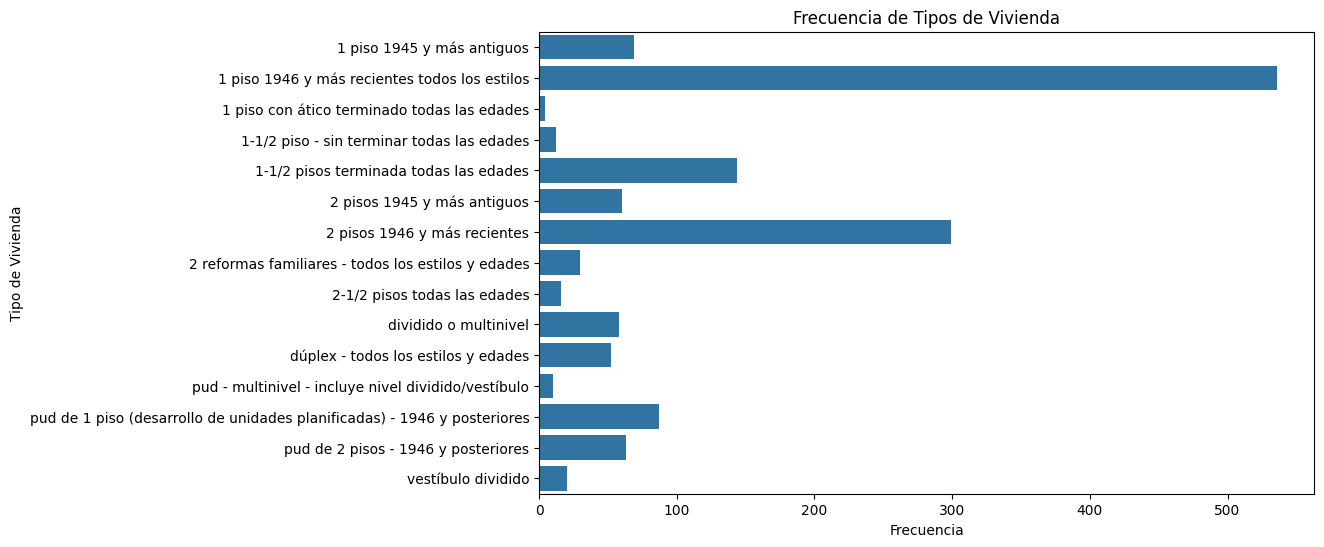

In [193]:
# Variable Tipo_Vivienda
# Contar la frecuencia de cada tipo de vivienda
frecuencia_tipo_vivienda = data['Tipo_Vivienda'].value_counts().reset_index()
frecuencia_tipo_vivienda.columns = ['Tipo_Vivienda', 'Frecuencia']
 
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Tipo_Vivienda', data=frecuencia_tipo_vivienda)
 
# Añadir títulos y etiquetas
plt.title('Frecuencia de Tipos de Vivienda')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Vivienda')
 
# Mostrar el gráfico
plt.show()

Del gráfico de barras se puede concluir que los tipos de vivienda que con mayor frecuencia se ven involucrados en la venta son; en primer lugar, viviendas de un solo piso en todos los estilos y construidas a partir de 1946, seguidas de las viviendas de dos pisos también construidas a partir de 1946. Por otra parte, las viviendas con menor demanda correspondes a las de un solo piso con ático d todas las edades, seguidas de las pud multinivel.  

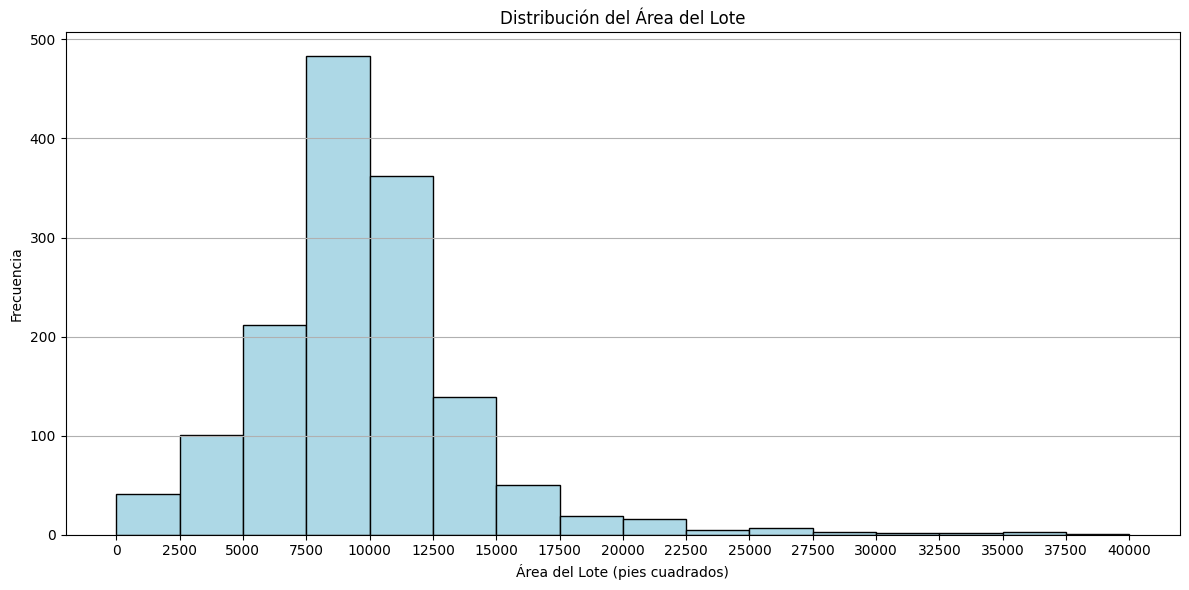

In [194]:
# Variable Area_Lote
# Definir los límites de los bins
bins = range(0, 40001, 2500) # [1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(data['Area_Lote'], bins=bins, color='lightblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución del Área del Lote')
plt.xlabel('Área del Lote (pies cuadrados)')
plt.ylabel('Frecuencia')
plt.xticks(bins)  # Mostrar los límites de los bins en el eje x
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En lo referente al área del lote, las viviendas que tienen mayor demanda corresponden a las que tienen lotes de entre 7500 y 10000 pies cuadrados, seguidas de aquellas cuyos lotes miden entre 10000 y 12500 pies cuadrados. También es importante resaltar que las viviendas cuyos lotes tienen un área menor a 2500 ft^2 o mayor a 15000 ft^2, tienen una menor demanda entre los compradores. 

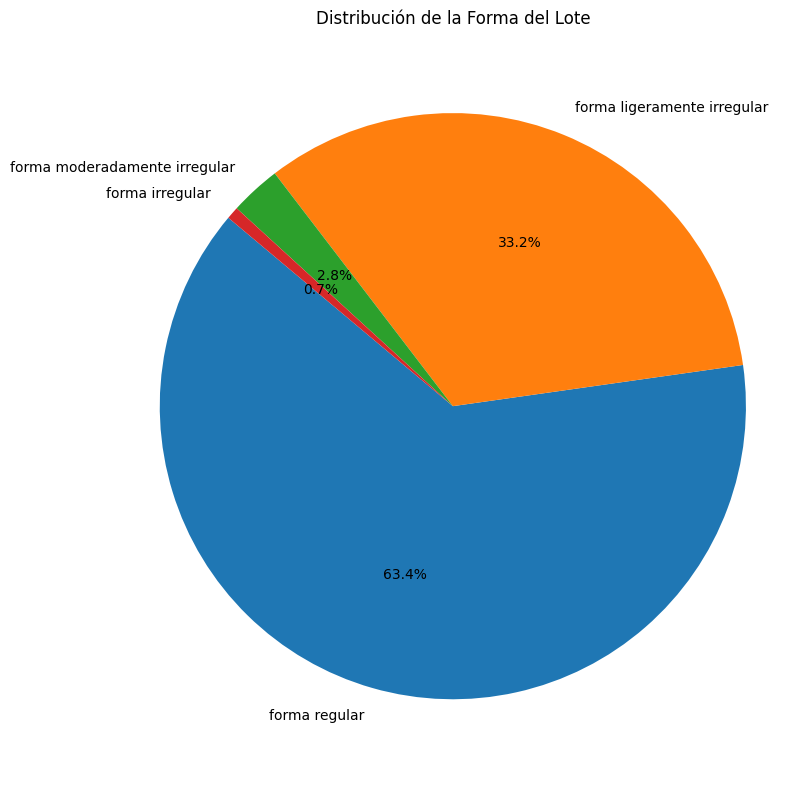

In [195]:
# Variable Forma_Lote
# Contar la frecuencia de cada categoría en Forma_Lote
frecuencia_forma_lote = data['Forma_Lote'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_forma_lote, labels=frecuencia_forma_lote.index, autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Distribución de la Forma del Lote')

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.tight_layout()
plt.show()

En cuanto a la forma del lote contruido, es claro que la mayoría de los compradores (63,4%) prefieren un lote de forma regular; es decir, cuyo perímetro está formado por líneas rectas, seguido de aquellos que prefieren una forma ligeramente irregular; que se puede enteder como aquellos lotes en los que alguno de sus lados no es recto (33.2%) y, finalmente, solo el 3.5% de los compradores escogieron lotes cuaya forma es moderadamente irregular o completamente irregular.

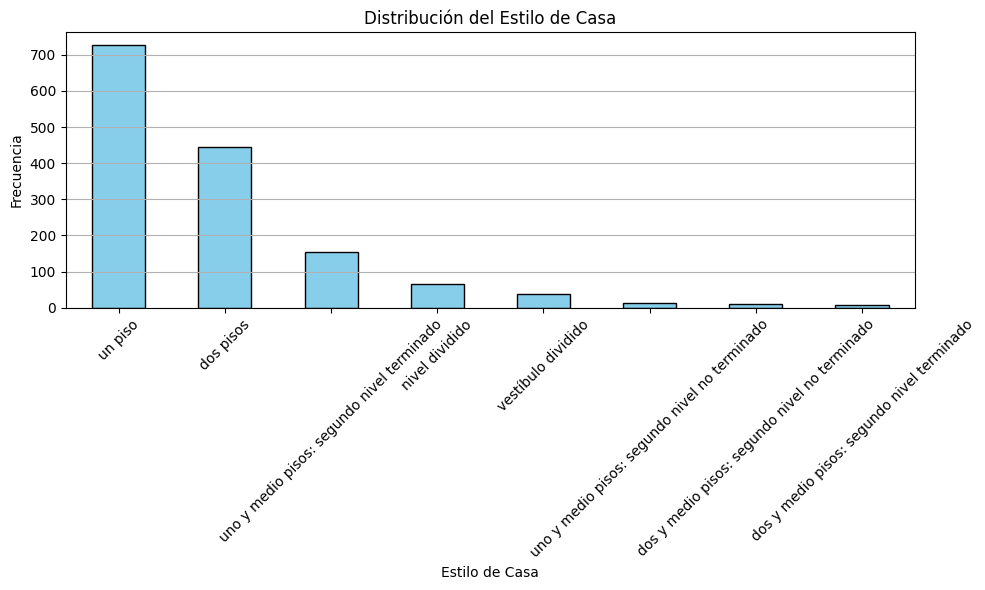

In [196]:
# Variable Estilo_Casa
# Contar la frecuencia de cada categoría en Estilo_Casa
frecuencia_estilo_casa = data['Estilo_Casa'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_estilo_casa.plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución del Estilo de Casa')
plt.xlabel('Estilo de Casa')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Al analizar la distribución de la variable Estilo de Casa, se puede establecer claramente que los compradores buscan, en su mayoría, viviendas de uno o dos pisos, en comparación con los demás estilos ofertados.

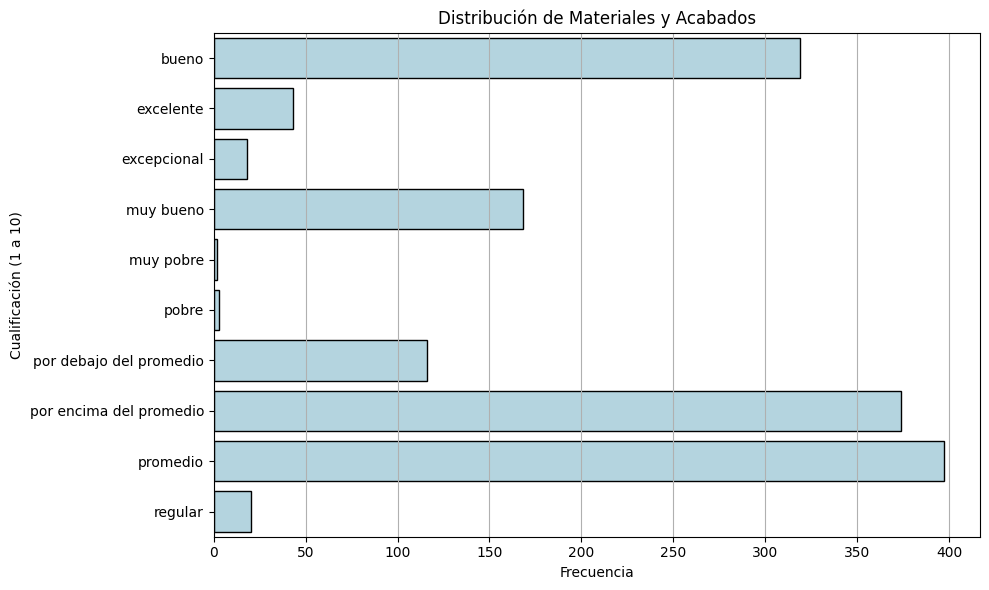

In [197]:
# Variable Material_Acabados
# Contar la frecuencia de cada cualificación
frecuencia_material = data['Material_Acabados'].value_counts().reset_index()
frecuencia_material.columns = ['Cualificación', 'Frecuencia']
 
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Cualificación', data=frecuencia_material, color='lightblue', edgecolor='black')
 
# Añadir títulos y etiquetas
plt.title('Distribución de Materiales y Acabados')
plt.xlabel('Frecuencia')
plt.ylabel('Cualificación (1 a 10)')
plt.grid(axis='x')
 
# Mostrar el gráfico
plt.tight_layout()
plt.show()

En cuanto a la distribución de la calidad de los materiales para los acabados de la vivienda, la mayoría de los compradores prefieren acabados tipo promedio, por encima del promedio y buenos. En menor proporción están aquellos que compran viviendas cuyos acabados están por debajo del promedio o cuyos acabados son muy buenos. Es posible que la decisión de compra basado este predictor, en la mayoría de los casos, dependa del presupuesto del comprador.

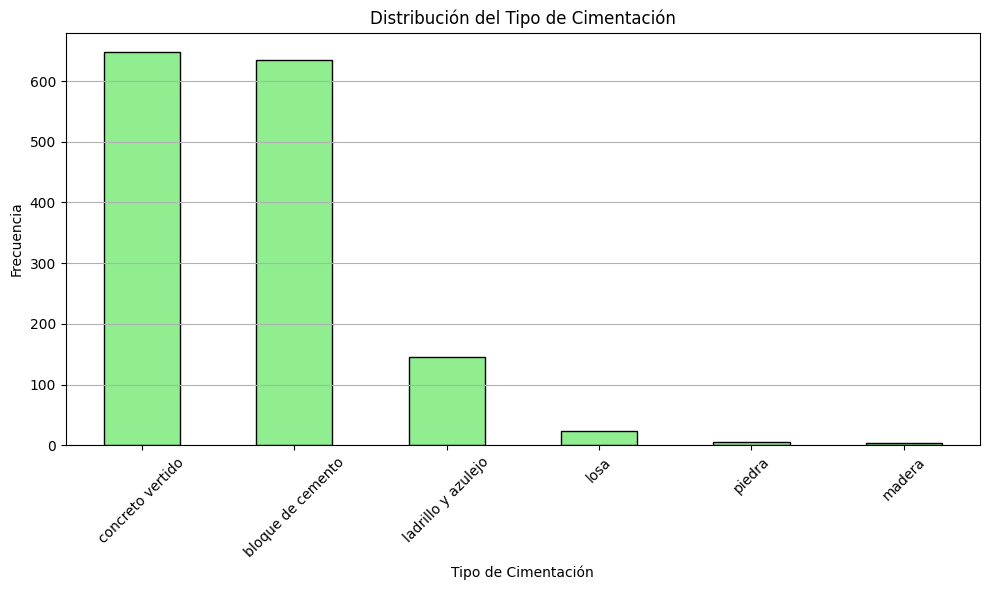

In [198]:
# Variable Tipo_Cimentación
# Contar la frecuencia de cada categoría en Tipo_Cimentación
frecuencia_tipo_cimentacion = data['Tipo_Cimentación'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_tipo_cimentacion.plot(kind='bar', color='lightgreen', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución del Tipo de Cimentación')
plt.xlabel('Tipo de Cimentación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Posiblemente por la resistencia y seguridad de la vivienda, los tipos de cimentación preferidos por los compradores se distribuyen con mayor frecuencia entre quienes compran viviendas cuyos cimientos están hechos en concreto vertido y bloques de cemento, respectivamente. Solo algunos compran viviendas con cimientos de ladrillo y azulejo y, en mucho menor proporción en materiales como losa, piedra o madera.

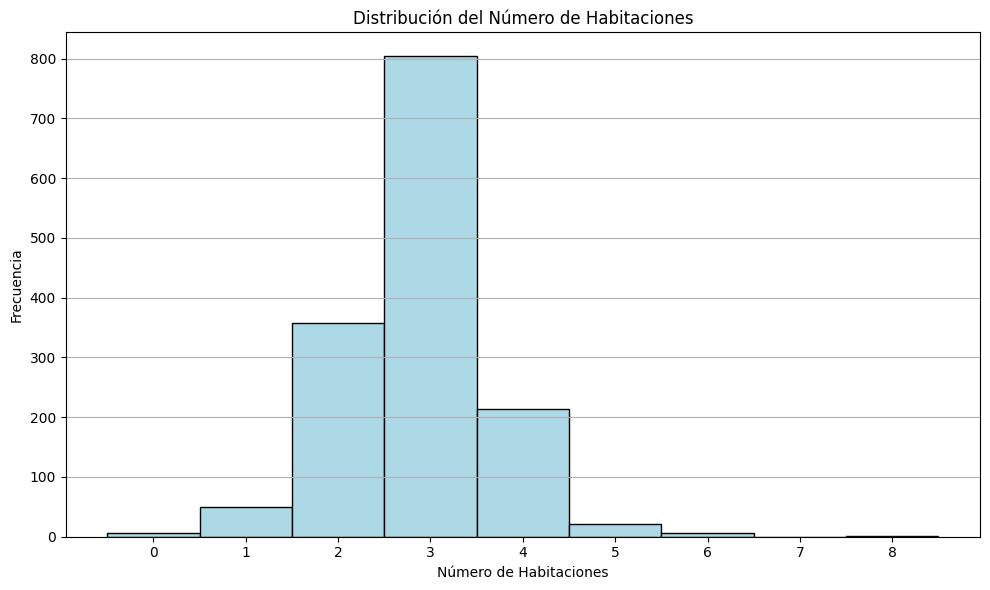

In [199]:
# Variable No. Habitaciones
# Crear el histograma para No. Habitaciones
plt.figure(figsize=(10, 6))
plt.hist(data['No. Habitaciones'], bins=range(0, 10), color='lightblue', edgecolor='black', align='left')

# Añadir títulos y etiquetas
plt.title('Distribución del Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 9))  # Marcas en el eje x para cada número de habitaciones
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Con respecto al número de habitaciones que tiene la vivienda, se encontró que la mayor frecuencia la tienen las casas con 3, 2 y 4 habitaciones, respectivamente. Lo anterior permite inferir que son fammilias promedio quienes habitan los predios.

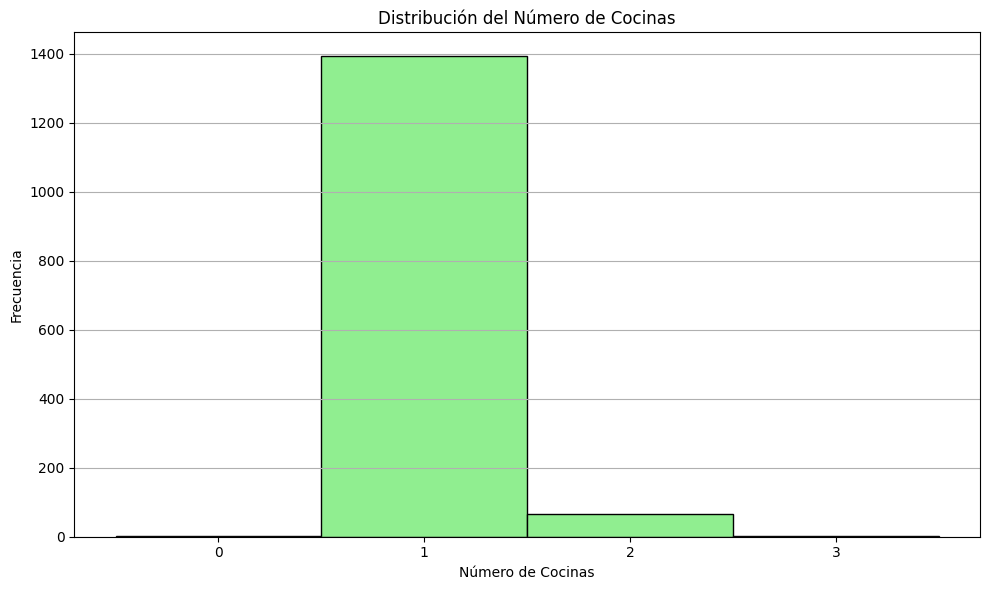

In [200]:
# Variable No. Cocinas
# Crear el histograma para No. Cocinas
plt.figure(figsize=(10, 6))
plt.hist(data['No. Cocinas'], bins=range(0, 5), color='lightgreen', edgecolor='black', align='left')

# Añadir títulos y etiquetas
plt.title('Distribución del Número de Cocinas')
plt.xlabel('Número de Cocinas')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 4))  # Marcas en el eje x para cada número de cocinas
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En cuento al número de cocinas que tiene cada vivienda, la categoría cuya frecuencia es mas alta es 1. Lo anterior concuerda con la observación de que la mayoría de las viviendas son adquiridas para ser habitadas por familias promedio. 

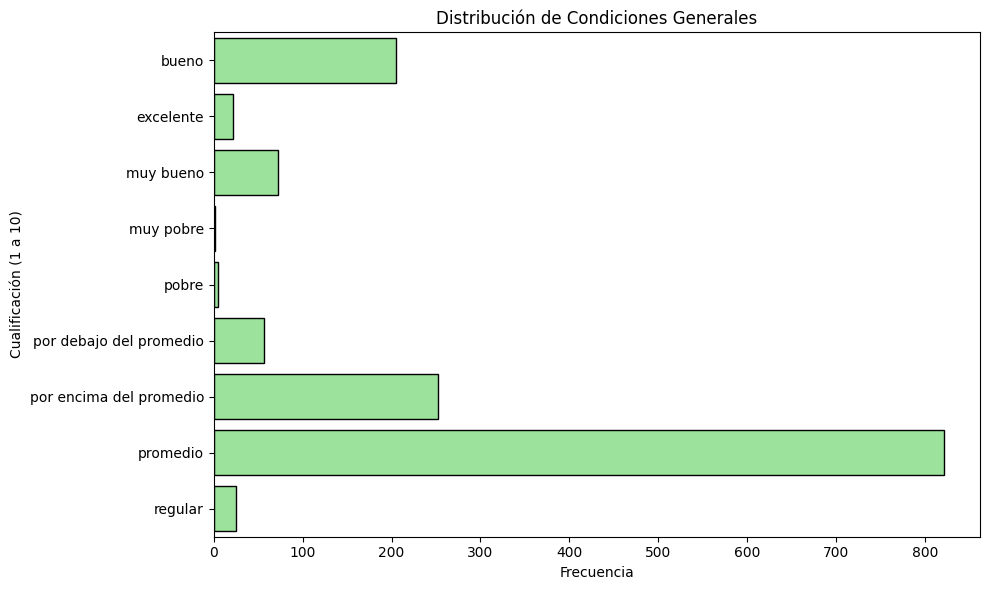

In [201]:
# Variable Cond._Generales
# Contar la frecuencia de cada cualificación
frecuencia_condiciones = data['Cond._Generales'].value_counts().reset_index()
frecuencia_condiciones.columns = ['Cualificación', 'Frecuencia']
 
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Cualificación', data=frecuencia_condiciones, color='lightgreen', edgecolor='black')
 
# Añadir títulos y etiquetas
plt.title('Distribución de Condiciones Generales')
plt.xlabel('Frecuencia')
plt.ylabel('Cualificación (1 a 10)')
 
# Mostrar el gráfico
plt.tight_layout()
plt.show()

En lo referente a las condiciones generales de la vivienda, así como en la distribución de la calidad de los materiales para los acabados , la mayoría de los compradores prefieren acabados tipo promedio, por encima del promedio y buenos. En menor proporción están aquellos que compran viviendas cuyas condciones generales están por debajo del promedio o son muy buenas.

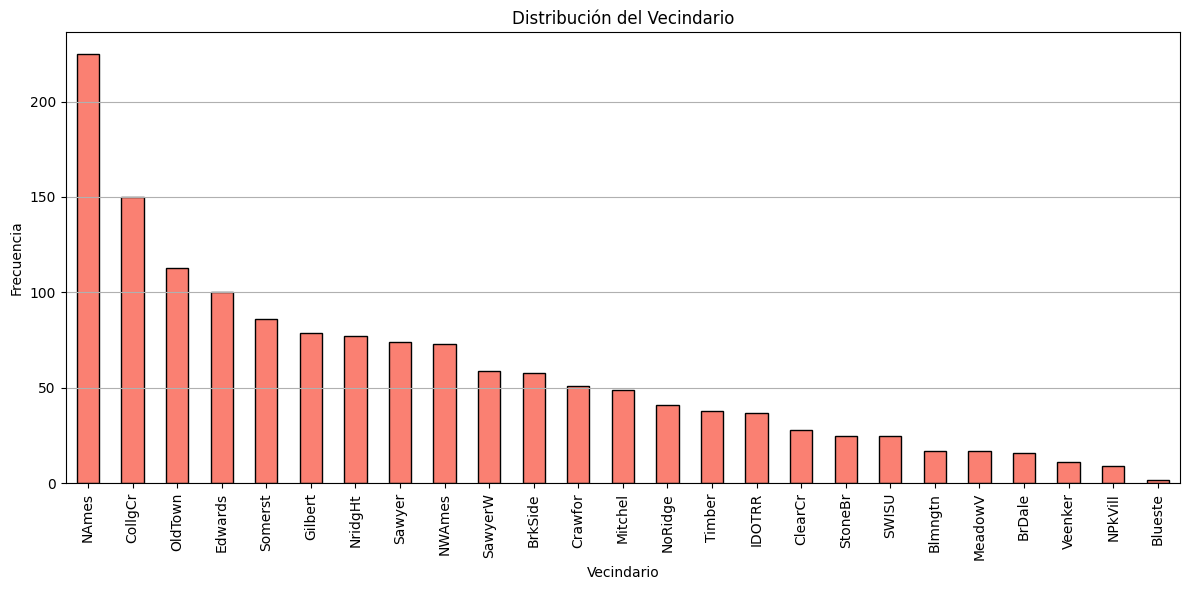

In [202]:
# Variable Vecindario
# Contar la frecuencia de cada categoría en Vecindario
frecuencia_vecindario = data['Vecindario'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
frecuencia_vecindario.plot(kind='bar', color='salmon', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución del Vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad debido a la cantidad de categorías
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Finalmente, los vecidarios más populares al momento de comprar vivenda en Ames, Iowa, son quellos que se encuentran al norte de la ciudad, seguido, en su orden de College Creek, Old Town, Edwards, Somerset y demás, de los 25 vecindarios categorizados,

# Paso 10: EDA — Análisis bivariado

### 10.1: ¿Cómo influye el tipo de vivienda en el precio de venta?

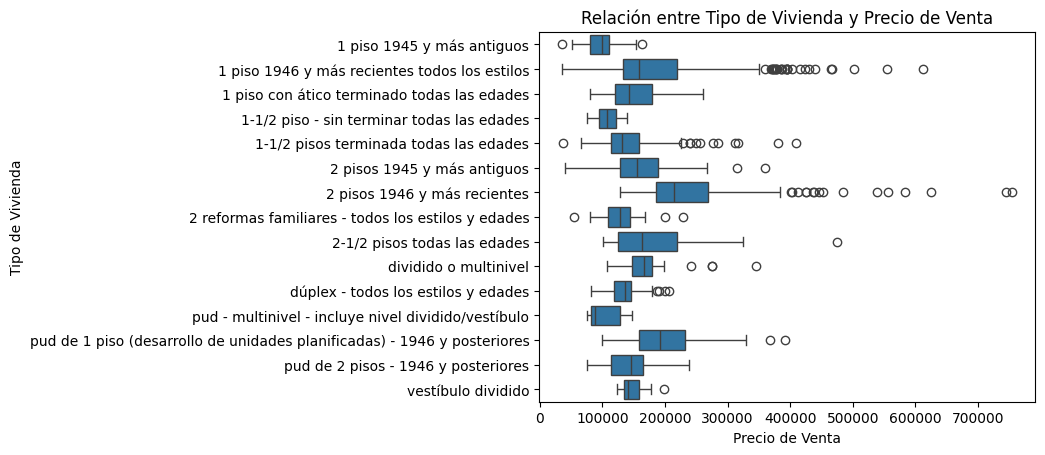

In [203]:
sns.boxplot(data=data, y='Tipo_Vivienda', x='Precio_de_Venta')
plt.title('Relación entre Tipo de Vivienda y Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Tipo de Vivienda')

plt.show()

Se puede observar que los tres tipos de vivienda que tienden a tener precios más altos son: '2 pisos 1946 y más recientes', seguidos por 'pud de 1 piso (desarrollo de unidades planificadas) - 1946 y posteriores', y finalmente '1 piso 1946 y más recientes todos los estilos'.

### 10.2: ¿De qué manera influye el área del lote en el precio de venta?

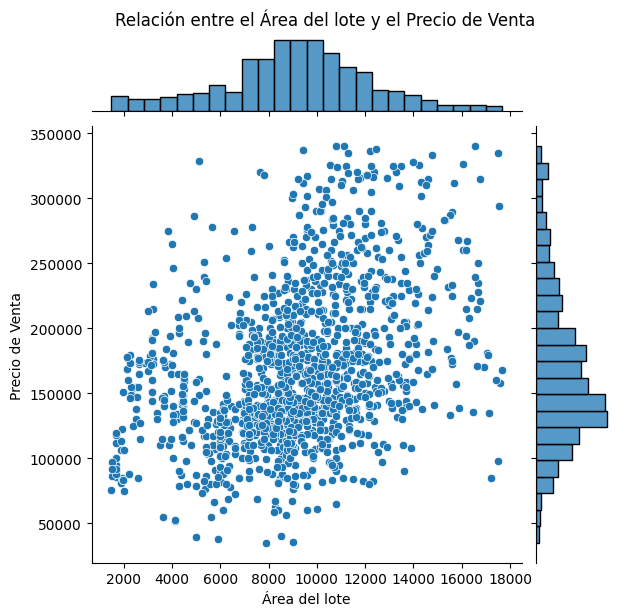

In [204]:
Q1 = data[['Precio_de_Venta', 'Area_Lote']].quantile(0.25)
Q3 = data[['Precio_de_Venta', 'Area_Lote']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[
    (data['Precio_de_Venta'] >= lower_bound['Precio_de_Venta']) & 
    (data['Precio_de_Venta'] <= upper_bound['Precio_de_Venta']) & 
    (data['Area_Lote'] >= lower_bound['Area_Lote']) & 
    (data['Area_Lote'] <= upper_bound['Area_Lote'])
]

g = sns.jointplot(data = filtered_data, x = 'Area_Lote', y = 'Precio_de_Venta')
g.fig.suptitle('Relación entre el Área del lote y el Precio de Venta', y=1.02)  # Adjust y for better placement
g.set_axis_labels('Área del lote', 'Precio de Venta')
plt.show()

La gráfica muestra una correlación positiva débil entre el área del lote y el precio de venta, es decir, a mayor área, los precios tienden a ser más altos, aunque la relación no es fuerte. La mayoría de las propiedades tienen áreas entre 6000 y 12000 unidades, con precios de venta entre 100,000 y 250,000, como lo indican los histogramas.

### 10.3: ¿Cómo la forma del lote influencia el precio de venta?

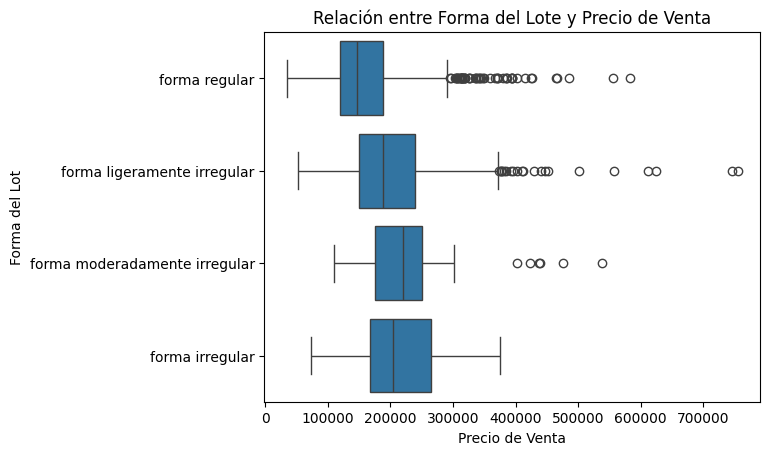

In [205]:
order = ['forma regular', 
         'forma ligeramente irregular', 
         'forma moderadamente irregular', 
         'forma irregular'
        ] 

sns.boxplot(data=data, y='Forma_Lote', x='Precio_de_Venta', order = order)
plt.title('Relación entre Forma del Lote y Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Forma del Lot')

plt.show()

Se observa que los lotes con forma regular y ligeramente irregular presentan más valores atípicos y un rango de precios más amplio. En contraste, los lotes con formas moderadamente irregulares e irregulares muestran un rango de precios más bajo y menos valores atípicos. Curiosamente, la mediana de los precios para los lotes regulares y ligeramente irregulares es más baja, mientras que la mediana de los precios para los lotes moderadamente irregulares e irregulares es más alta.

### 10.4 ¿Cómo influye el estilo de la casa en el precio de venta?

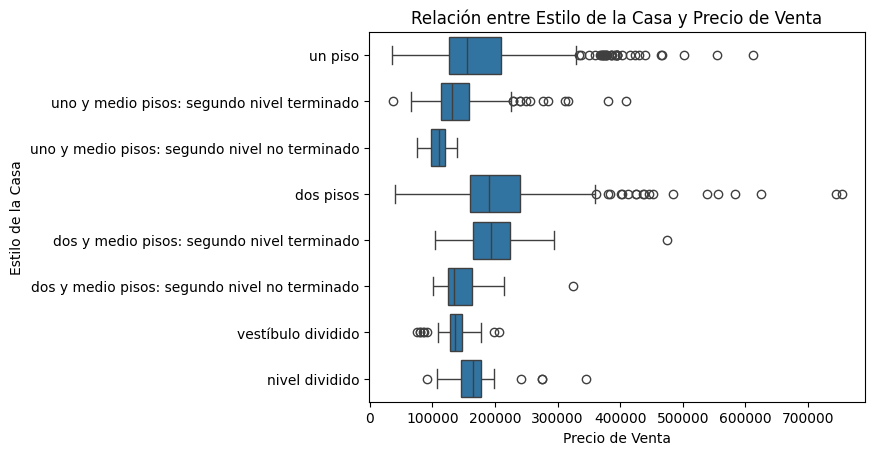

In [206]:
order = ['un piso', 
         'uno y medio pisos: segundo nivel terminado', 
         'uno y medio pisos: segundo nivel no terminado', 
         'dos pisos',
         'dos y medio pisos: segundo nivel terminado',
         'dos y medio pisos: segundo nivel no terminado',
         'vestíbulo dividido',
         'nivel dividido'
        ] 

sns.boxplot(data=data, y='Estilo_Casa', x='Precio_de_Venta', order = order)
plt.title('Relación entre Estilo de la Casa y Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Estilo de la Casa')

plt.show()

Se observa que las casas de un piso tienden a tener un incremento en el precio y muestran una mayor dispersión en comparación con las casas de uno y medio pisos, tanto terminadas como no terminadas. Por otro lado, las casas de dos pisos presentan un rango de precios más amplio en comparación con las casas de dos y medio pisos de segundo nivel, ya sea que estén terminadas o no.

### 10.5 ¿Cómo influyen los materiales y acabados en el precio de venta?

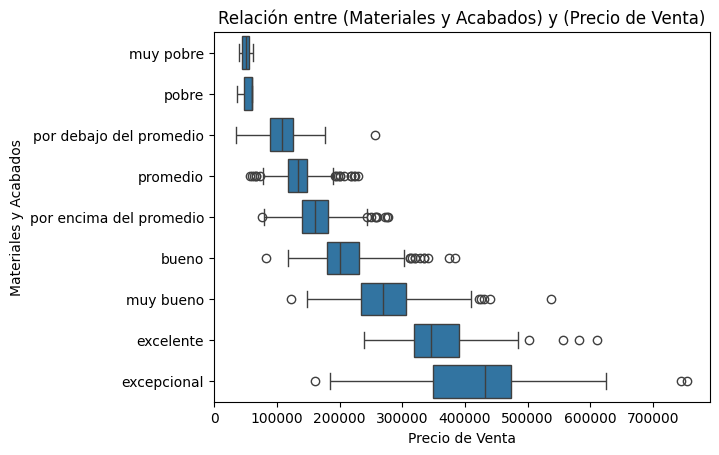

In [207]:
order = ['muy pobre', 
         'pobre', 
         'por debajo del promedio', 
         'promedio', 
         'por encima del promedio',
         'bueno',
         'muy bueno',
         'excelente',
         'excepcional'
        ] 

sns.boxplot(data = data, y = 'Material_Acabados', x = 'Precio_de_Venta', order = order)
plt.title('Relación entre (Materiales y Acabados) y (Precio de Venta)')
plt.xlabel('Precio de Venta')
plt.ylabel('Materiales y Acabados')

plt.show()

La gráfica muestra que a medida que mejora la calidad de los materiales y acabados de una vivienda, el precio de venta aumenta. Las categorías con mejores acabados, como "muy bueno", "excelente" y "excepcional", presentan precios más altos y mayor dispersión. Los materiales "excepcional" muestran la mayor variabilidad en los precios, alcanzando los valores más altos.

### 10.6 ¿Cómo influyen los tipos de cimentación en el precio de venta

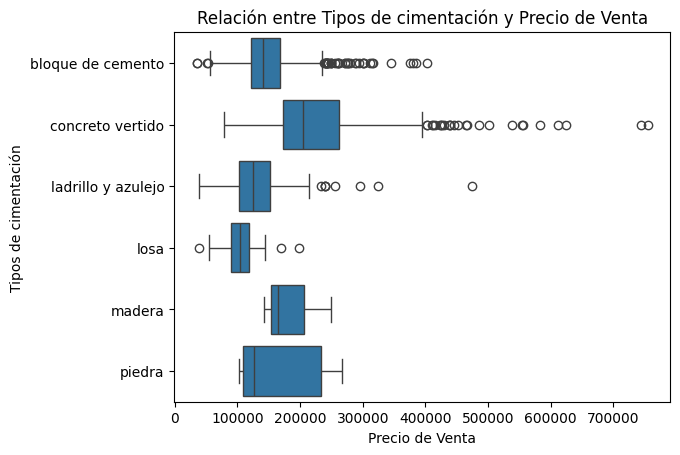

In [208]:
sns.boxplot(data = data, y = 'Tipo_Cimentación', x = 'Precio_de_Venta')
plt.title('Relación entre Tipos de cimentación y Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Tipos de cimentación')

plt.show()

Se puede observar que el concreto vertido presenta la mayor dispersión en los costos entre los diferentes tipos de cimentación, además de tener los costos más altos en comparación con los demás tipos de cimentación.

### 10.7 ¿Cómo influye el número de habitaciones en el precio de venta?

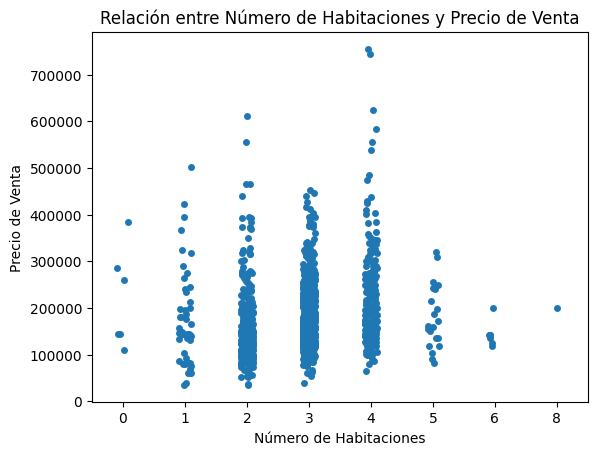

In [209]:
sns.stripplot(data=data, x='No. Habitaciones', y='Precio_de_Venta')
plt.title('Relación entre Número de Habitaciones y Precio de Venta')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio de Venta')

plt.show()

Se observa que el número de habitaciones presenta un rango de precios de venta entre 10,000 y 40,000. Además, se nota una tendencia de incremento en los precios para las casas con entre 1 y 4 habitaciones.

### 10.8 ¿Cómo influye el número de cocinas en el precio de venta?

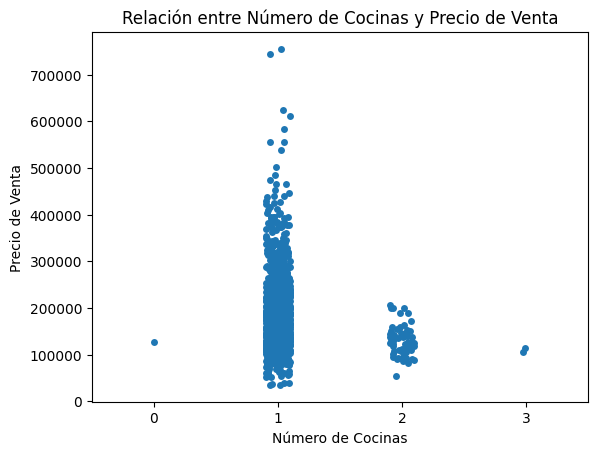

In [210]:
sns.stripplot(data=data, x='No. Cocinas', y='Precio_de_Venta')
plt.title('Relación entre Número de Cocinas y Precio de Venta')
plt.xlabel('Número de Cocinas')
plt.ylabel('Precio de Venta')

plt.show()

Observamos que casi no hay viviendas con 0 o 3 cocinas. La mayoría de las viviendas tienen una cocina, y estas son las que presentan los precios más altos en comparación con las viviendas que tienen dos cocinas. Además, se destaca que la mayor concentración de precios se encuentra en el rango de 100,000 a 300,000.

### 10.9 ¿Cómo influyen las condiciones generales en el precio de venta?

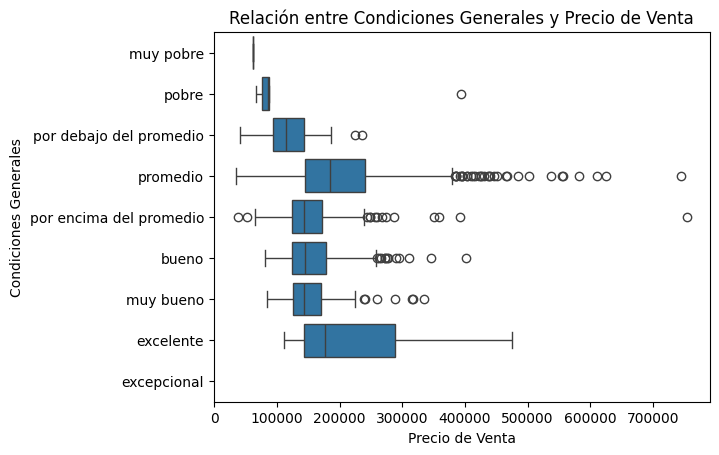

In [211]:
order = ['muy pobre', 
         'pobre', 
         'por debajo del promedio', 
         'promedio', 
         'por encima del promedio',
         'bueno',
         'muy bueno',
         'excelente',
         'excepcional'
        ] 

sns.boxplot(data=data, y='Cond._Generales', x='Precio_de_Venta', order=order)
plt.title('Relación entre Condiciones Generales y Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Condiciones Generales')
plt.show()

Se observa que las condiciones generales de las variables que van de 'muy pobre' a 'por debajo del promedio' tienden a tener precios inferiores al promedio. El promedio presenta la mayor dispersión en las calificaciones. Además, parece que las condiciones superiores al promedio no influyen significativamente en el precio de venta de una vivienda.

### 10.10 ¿Cómo influye el vecindario en el precio de venta?

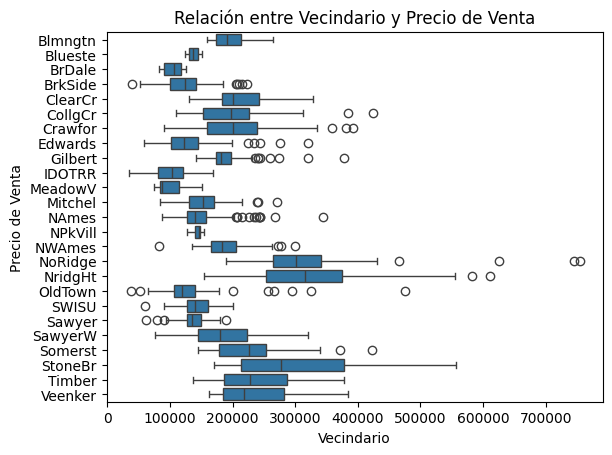

In [212]:
sns.boxplot(data = data, y = 'Vecindario', x = 'Precio_de_Venta')
plt.title('Relación entre Vecindario y Precio de Venta')
plt.xlabel('Vecindario')
plt.ylabel('Precio de Venta')
plt.show()

Se observa que los vecindarios con mayores precios de venta son: 'NridgHt', seguidos por 'NoRidge' y, finalmente, 'StoneBr'.

# Paso 11: EDA - Análisis Multivariante

### 11.1 ¿Cómo se relacionan el área del lote y el número de habitaciones con el precio de venta de la propiedad?

c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


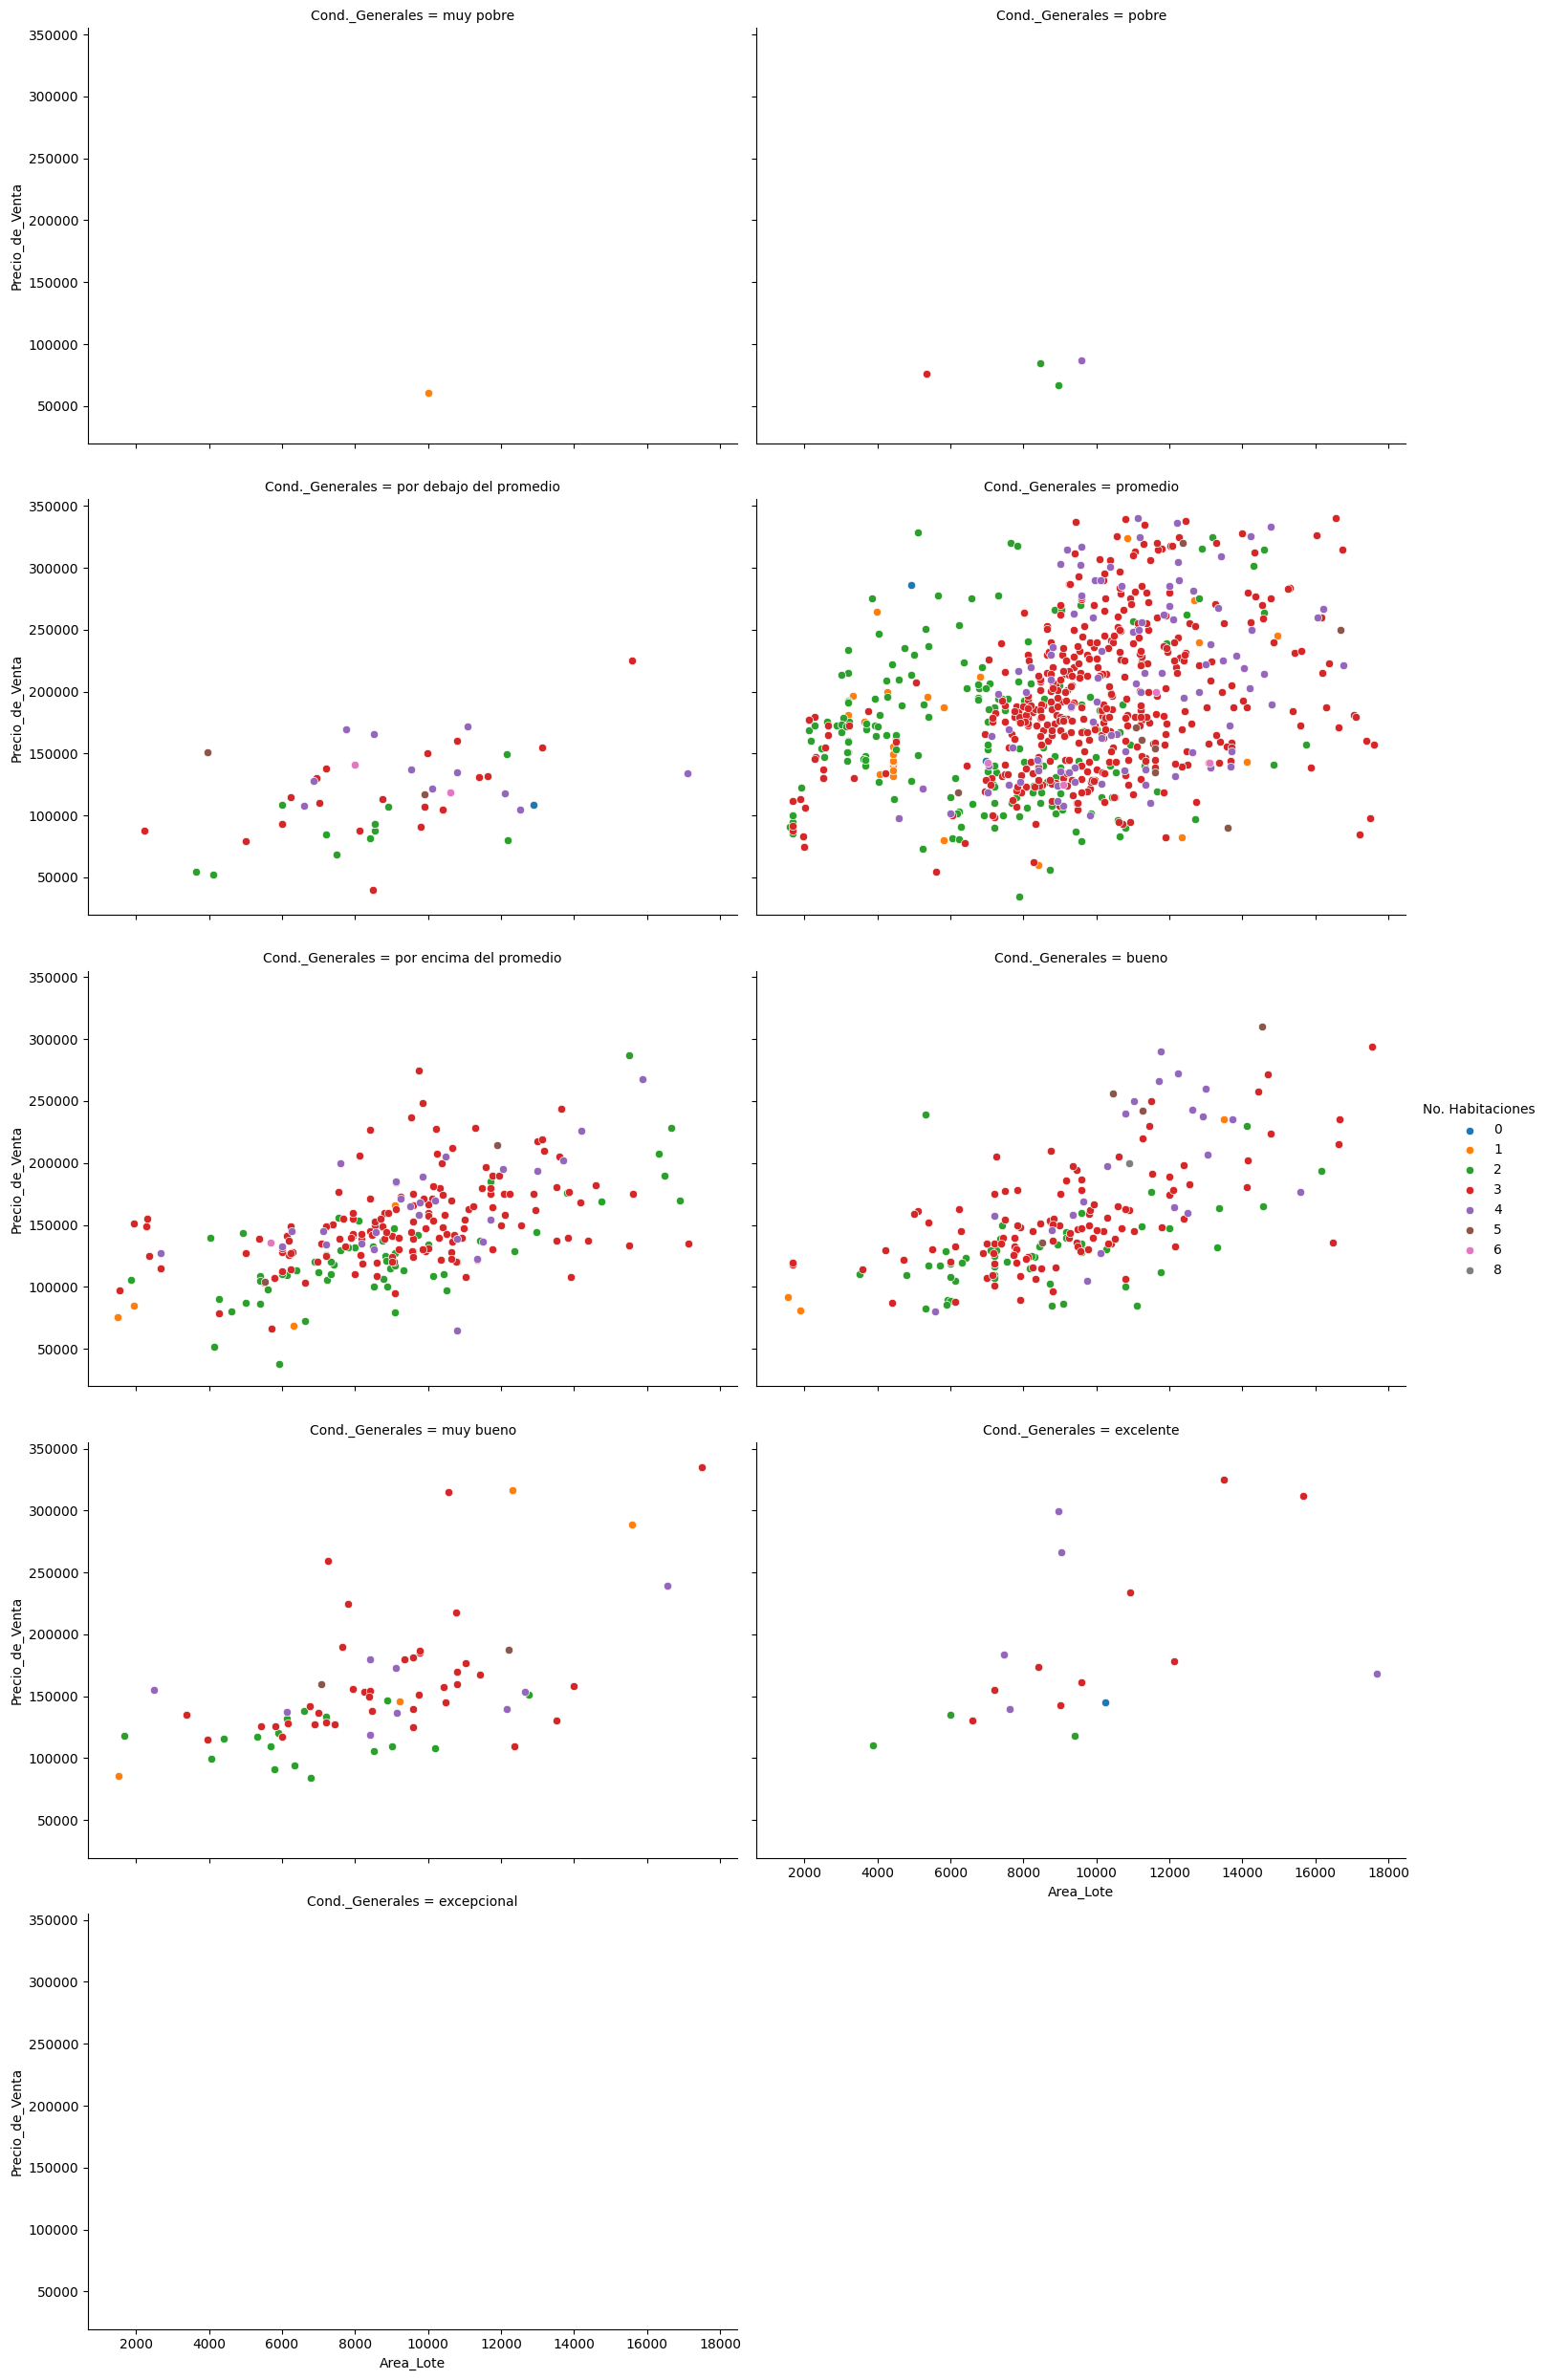

In [213]:
# Define the order for 'Cond._Generales'
order = ['muy pobre', 
         'pobre', 
         'por debajo del promedio', 
         'promedio', 
         'por encima del promedio',
         'bueno',
         'muy bueno',
         'excelente',
         'excepcional'
        ]

# Step 1: Convert 'Cond._Generales' to a categorical type with a specified order
data['Cond._Generales'] = pd.Categorical(data['Cond._Generales'], categories=order, ordered=True)

# Step 2: Calculate the IQR for 'Precio_de_Venta' and 'Area_Lote'
Q1 = data[['Precio_de_Venta', 'Area_Lote']].quantile(0.25)
Q3 = data[['Precio_de_Venta', 'Area_Lote']].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to remove outliers
filtered_data = data[
    (data['Precio_de_Venta'] >= lower_bound['Precio_de_Venta']) & 
    (data['Precio_de_Venta'] <= upper_bound['Precio_de_Venta']) & 
    (data['Area_Lote'] >= lower_bound['Area_Lote']) & 
    (data['Area_Lote'] <= upper_bound['Area_Lote'])
]

# Step 5: Create the FacetGrid plot with the filtered data
plot = sns.FacetGrid(filtered_data, col='Cond._Generales', hue='No. Habitaciones', height=5, aspect=1.5, col_wrap=2)
plot.map(sns.scatterplot, 'Area_Lote', 'Precio_de_Venta')

# Add a legend for better clarity
plot.add_legend()
plt.show()

Se observa una correlación moderada entre el área del lote y el precio de venta en las propiedades con condiciones generales clasificadas como buenas y muy buenas. Sin embargo, esta correlación es débil para las otras variables analizadas. Además, parece que el número de habitaciones no está relacionado ni con el área del lote ni con el precio de venta. 

### 11.2 ¿Qué relaciones se pueden identificar entre el área del lote, la cantidad de habitaciones y el número de cocinas en relación con el precio de venta?

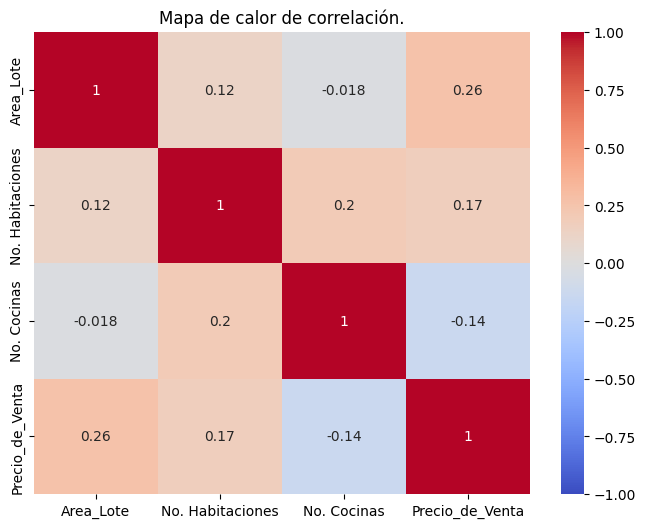

In [214]:
# Select the numerical columns you want to analyze
numerical_cols = ['Area_Lote', 'No. Habitaciones', 'No. Cocinas', 'Precio_de_Venta']

# Calculate the correlation matrix
corr_matrix = data[numerical_cols].corr()

# Plot a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Mapa de calor de correlación.')
plt.show()

En el gráfico de mapeo de calor, se observa que el área del lote presenta una correlación positiva débil con el precio de venta. Asimismo, el número de habitaciones también muestra una correlación positiva débil con el precio de venta. Por otro lado, el número de cocinas revela una correlación negativa débil con el precio de venta. En conclusión, no se puede afirmar que exista una relación fuerte entre estas variables y el precio de venta.

# Step 15: Observing Data, Insights, and Storytelling